In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/sphere/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().sphere()

X.shape =  (10000, 3)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=15, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'hsv', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2500 points processed...
A_k, Atilde_k: 5000 points processed...
A_k, Atilde_k: 7500 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2500 points processed...
local_param: 5000 points processed...
local_param: 7500 points processed...
local_param: all 10000 points processed...
After iter 1, max distortion is 2.795433
After iter 2, max distortion is 2.071369
After iter 3, max distortion is 2.071369
After iter 4, max distortion is 2.071369
After iter 5, max distortion is 2.024951
After iter 6, max distortion is 1.912494
After iter 7, max distortion is 1.822707
After iter 8, max distortion is 1.822707
After iter 9, max distortion is 1.822707
After iter 10, max distortion is 1.822707
After iter 11, max distortion is 1.822707
After iter 12, max distortion is 1.822707
After iter 13, max distortion is 1.822707
After iter 14, 

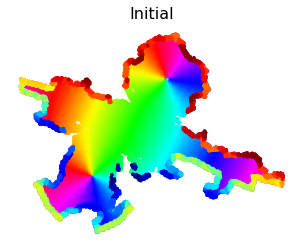

###############
Took 13.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.00021090930662700437


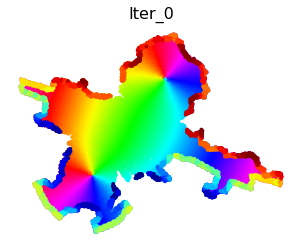

Iteration: 1
error: 0.0002485289295709566
Iteration: 2
error: 0.0002754425521967103
Iteration: 3
error: 0.0003321038197049012
Iteration: 4
error: 0.0003682353537163169
Iteration: 5
error: 0.0004205511525491259


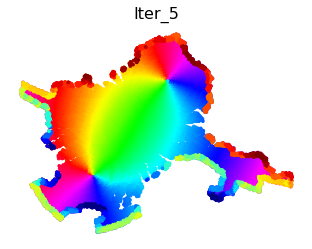

Iteration: 6
error: 0.00042735401489134544
Iteration: 7
error: 0.00045307174278115075
Iteration: 8
error: 0.00047281339977538016
Iteration: 9
error: 0.0004944695206044247
Iteration: 10
error: 0.000538076194471306


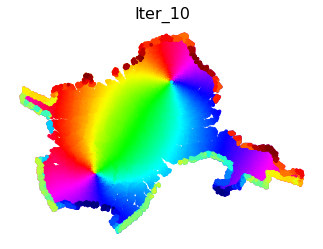

Iteration: 11
error: 0.0005718061361798561
Iteration: 12
error: 0.0006065192828118587
Iteration: 13
error: 0.0006364599731258825
Iteration: 14
error: 0.0006534232608689785
Iteration: 15
error: 0.0006788840400435588


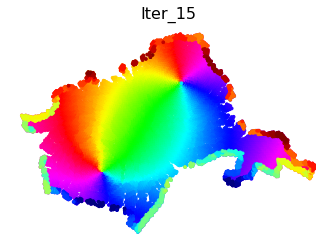

Iteration: 16
error: 0.0006848435090671524
Iteration: 17
error: 0.0006954379681490332
Iteration: 18
error: 0.0007103084763802114
Iteration: 19
error: 0.0007119384555412293


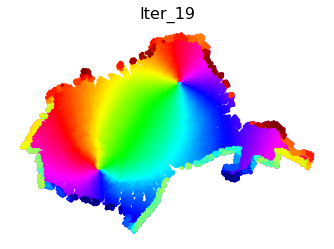

###############
Took 333.9 seconds to refine global embedding.
###############
###############
Took 349.2 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [20]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [21]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=5, n_components=2, n_jobs=-1, random_state=42)

In [22]:
y_ltsa = ltsa_obj.fit_transform(X)

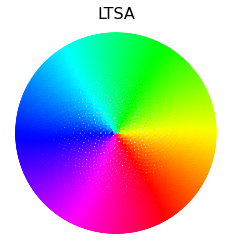

In [23]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'hsv', title='LTSA')

# UMAP

In [24]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [25]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.5, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [26]:
y_umap = umap_obj.fit_transform(X)

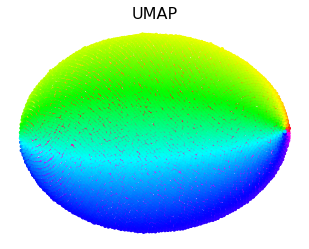

In [27]:
vis.global_embedding(y_umap, labelsMat[:,0], 'hsv', title='UMAP')

# t-SNE

In [28]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [29]:
tsne_obj = TSNE(perplexity=60, early_exaggeration=4, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [30]:
y_tsne = tsne_obj.fit_transform(X)

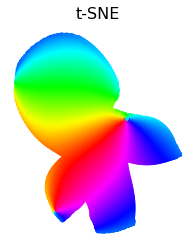

In [31]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'hsv', title='t-SNE')